In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!pip install Cython

In [2]:
!pip install keras_retinanet 

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=156782 sha256=93135a7b23d4f042a08df12a02fc8b8d79cdbfd115361db8b4eb15d212b3e323
  Stored in directory: /root/.cache/pip/wheels/d9/a5/98/87f8ed08913b184bb625dde1c1277a4dfe969c77b377abde69
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20485 sha256=591b5ee3df123be8517ca1aa3a72294c544c715a65765a195742a438c71d88d9
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [0]:
# or cp from the git using url + .git
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 5410 (delta 8), reused 7 (delta 2), pack-reused 5388
Receiving objects: 100% (5410/5410), 13.32 MiB | 23.88 MiB/s, done.
Resolving deltas: 100% (3611/3611), done.


In [4]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color


# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

Using TensorFlow backend.


In [0]:
import pandas
df=pandas.read_csv('/content/drive/My Drive/Colab Notebooks/class_map.csv') 
df=pandas.concat([pandas.DataFrame([{'0':0}]), df], ignore_index=True)
df # problem, first line in the name of the colums

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [0]:
df.to_csv('good.csv')
df=pandas.read_csv('/content/good.csv')
df

,Unnamed: 0,0
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [5]:
import pandas
df2=pandas.read_csv('/content/good.csv')
df2

,image_id,y1,x1,y2,x2,class
0,ds11/1.png,104,179,172,244,0
1,ds11/2.png,104,182,170,243,0
2,ds11/3.png,114,174,180,245,0
3,ds11/4.png,103,177,172,246,0
4,ds11/5.png,109,170,176,247,0
...,...,...,...,...,...,...
2598,ds11/712.png,91,76,127,110,8
2599,ds11/712.png,93,108,130,141,8
2600,ds11/919.png,104,133,128,175,2
2601,ds11/921.png,129,54,153,92,2


In [6]:
# swap x1 and y1 # swap x2 and y2
x=pandas.DataFrame({'image_id':df2['image_id'],'x1':df2['x1'],'y1':df2['y1'],'x2':df2['x2'],'y2':df2['y2'],'class_name':df2['class']})
x

,image_id,x1,y1,x2,y2,class_name
0,ds11/1.png,179,104,244,172,0
1,ds11/2.png,182,104,243,170,0
2,ds11/3.png,174,114,245,180,0
3,ds11/4.png,177,103,246,172,0
4,ds11/5.png,170,109,247,176,0
...,...,...,...,...,...,...
2598,ds11/712.png,76,91,110,127,8
2599,ds11/712.png,108,93,141,130,8
2600,ds11/919.png,133,104,175,128,2
2601,ds11/921.png,54,129,92,153,2


In [0]:
#df2[:2000].to_csv('/content/drive/My Drive/Colab Notebooks/train.csv',index=False)
#df2[2000:].to_csv('/content/drive/My Drive/Colab Notebooks/val.csv',index=False)
x[:2000].to_csv('/content/drive/My Drive/Colab Notebooks/train.csv',index=False, header=False)
x[2000:].to_csv('/content/drive/My Drive/Colab Notebooks/val.csv',index=False, header=False)

In [0]:
pandas.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

,ds11/1.png,179,104,244,172,0
0,ds11/2.png,182,104,243,170,0
1,ds11/3.png,174,114,245,180,0
2,ds11/4.png,177,103,246,172,0
3,ds11/5.png,170,109,247,176,0
4,ds11/6.png,171,110,247,174,0
...,...,...,...,...,...,...
1994,ds11/795.png,10,168,47,188,9
1995,ds11/795.png,0,120,19,155,9
1996,ds11/795.png,16,117,47,149,9
1997,ds11/795.png,45,101,76,131,9


In [33]:
from keras_retinanet.bin import train
train.main(['--epochs', '40', '--steps', '100', 'csv', '/content/drive/My Drive/Colab Notebooks/train.csv','/content/drive/My Drive/Colab Notebooks/good.csv','--val-annotations', '/content/drive/My Drive/Colab Notebooks/val.csv']) 

Creating model, this may take a second...
Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        input_7[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6 0           bn_conv1[0][0]                   
________________________________________________

Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:06 Time:  0:00:06
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.0000
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.0000
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 0.0000
2 instances of class 8 with average precision: 0.0000
0 instances of class 9 with average precision: 0.0000
mAP: 0.0000

Epoch 00001: saving model to ./snapshots/resnet50_csv_01.h5
Epoch 2/40
100/100 [==============================] - 22s 224ms/step - loss: 3.4889 - regression_loss: 2.3932 - classification_loss: 1.0958


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.0000
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.1227
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0089
0 instances of class 9 with average precision: 0.0000
mAP: 0.2829

Epoch 00002: saving model to ./snapshots/resnet50_csv_02.h5
Epoch 3/40
100/100 [==============================] - 22s 224ms/step - loss: 2.6091 - regression_loss: 1.8207 - classification_loss: 0.7883


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.0155
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.1364
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0097
0 instances of class 9 with average precision: 0.0000
mAP: 0.2904

Epoch 00003: saving model to ./snapshots/resnet50_csv_03.h5
Epoch 4/40
100/100 [==============================] - 22s 224ms/step - loss: 2.2344 - regression_loss: 1.6179 - classification_loss: 0.6165


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.0600
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.1366
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 0.0476
2 instances of class 8 with average precision: 0.0136
0 instances of class 9 with average precision: 0.0000
mAP: 0.0645

Epoch 00004: saving model to ./snapshots/resnet50_csv_04.h5
Epoch 5/40
100/100 [==============================] - 22s 223ms/step - loss: 1.8848 - regression_loss: 1.3311 - classification_loss: 0.5536


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.2742
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.1852
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 0.1818
2 instances of class 8 with average precision: 0.0134
0 instances of class 9 with average precision: 0.0000
mAP: 0.1636

Epoch 00005: saving model to ./snapshots/resnet50_csv_05.h5
Epoch 6/40
100/100 [==============================] - 22s 224ms/step - loss: 1.6266 - regression_loss: 1.1415 - classification_loss: 0.4852


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.2792
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.0747
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 0.0312
2 instances of class 8 with average precision: 0.0108
0 instances of class 9 with average precision: 0.0000
mAP: 0.0990

Epoch 00006: saving model to ./snapshots/resnet50_csv_06.h5
Epoch 7/40
100/100 [==============================] - 22s 224ms/step - loss: 1.5741 - regression_loss: 1.1113 - classification_loss: 0.4628


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.3725
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.1875
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 0.4000
2 instances of class 8 with average precision: 0.0156
0 instances of class 9 with average precision: 0.0000
mAP: 0.2439

Epoch 00007: saving model to ./snapshots/resnet50_csv_07.h5
Epoch 8/40
100/100 [==============================] - 22s 224ms/step - loss: 1.5319 - regression_loss: 1.0785 - classification_loss: 0.4534


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.4548
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.1402
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0174
0 instances of class 9 with average precision: 0.0000
mAP: 0.4031

Epoch 00008: saving model to ./snapshots/resnet50_csv_08.h5
Epoch 9/40
100/100 [==============================] - 22s 224ms/step - loss: 1.4230 - regression_loss: 1.0199 - classification_loss: 0.4031


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.4517
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.0295
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 0.4500
2 instances of class 8 with average precision: 0.0136
0 instances of class 9 with average precision: 0.0000
mAP: 0.2362

Epoch 00009: saving model to ./snapshots/resnet50_csv_09.h5
Epoch 10/40
100/100 [==============================] - 23s 229ms/step - loss: 1.3345 - regression_loss: 0.9421 - classification_loss: 0.3924


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6198
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.0241
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0156
0 instances of class 9 with average precision: 0.0000
mAP: 0.4149

Epoch 00010: saving model to ./snapshots/resnet50_csv_10.h5
Epoch 11/40
100/100 [==============================] - 23s 225ms/step - loss: 1.3267 - regression_loss: 0.9388 - classification_loss: 0.3879


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6091
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.2024
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0137
0 instances of class 9 with average precision: 0.0000
mAP: 0.4563

Epoch 00011: saving model to ./snapshots/resnet50_csv_11.h5
Epoch 12/40
100/100 [==============================] - 23s 225ms/step - loss: 1.2023 - regression_loss: 0.8519 - classification_loss: 0.3504


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6031
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.0620
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0211
0 instances of class 9 with average precision: 0.0000
mAP: 0.4215

Epoch 00012: saving model to ./snapshots/resnet50_csv_12.h5
Epoch 13/40
100/100 [==============================] - 23s 225ms/step - loss: 1.1655 - regression_loss: 0.8212 - classification_loss: 0.3444


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.3351
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.3929
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0211
0 instances of class 9 with average precision: 0.0000
mAP: 0.4372

Epoch 00013: saving model to ./snapshots/resnet50_csv_13.h5
Epoch 14/40
100/100 [==============================] - 22s 223ms/step - loss: 1.1855 - regression_loss: 0.8608 - classification_loss: 0.3246


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.3424
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.0672
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0196
0 instances of class 9 with average precision: 0.0000
mAP: 0.3573

Epoch 00014: saving model to ./snapshots/resnet50_csv_14.h5
Epoch 15/40
100/100 [==============================] - 22s 225ms/step - loss: 1.1178 - regression_loss: 0.7943 - classification_loss: 0.3235


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.5469
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.3333
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0204
0 instances of class 9 with average precision: 0.0000
mAP: 0.4751

Epoch 00015: saving model to ./snapshots/resnet50_csv_15.h5
Epoch 16/40
100/100 [==============================] - 23s 226ms/step - loss: 1.0965 - regression_loss: 0.7787 - classification_loss: 0.3178


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.5223
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.4500
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0303
0 instances of class 9 with average precision: 0.0000
mAP: 0.5007

Epoch 00016: saving model to ./snapshots/resnet50_csv_16.h5
Epoch 17/40
100/100 [==============================] - 22s 225ms/step - loss: 1.0978 - regression_loss: 0.7839 - classification_loss: 0.3138


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.5569
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.3409
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0263
0 instances of class 9 with average precision: 0.0000
mAP: 0.4810

Epoch 00017: saving model to ./snapshots/resnet50_csv_17.h5
Epoch 18/40
100/100 [==============================] - 22s 224ms/step - loss: 1.1009 - regression_loss: 0.7868 - classification_loss: 0.3141


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6034
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0625
0 instances of class 9 with average precision: 0.0000
mAP: 0.5831

Epoch 00018: saving model to ./snapshots/resnet50_csv_18.h5

Epoch 00018: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 19/40
100/100 [==============================] - 23s 229ms/step - loss: 0.9866 - regression_loss: 0.7030 - classification_loss: 0.2836


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6344
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0588
0 instances of class 9 with average precision: 0.0000
mAP: 0.5900

Epoch 00019: saving model to ./snapshots/resnet50_csv_19.h5
Epoch 20/40
100/100 [==============================] - 23s 225ms/step - loss: 0.8850 - regression_loss: 0.6051 - classification_loss: 0.2799


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6990
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0500
0 instances of class 9 with average precision: 0.0000
mAP: 0.6039

Epoch 00020: saving model to ./snapshots/resnet50_csv_20.h5
Epoch 21/40
100/100 [==============================] - 22s 225ms/step - loss: 0.9269 - regression_loss: 0.6494 - classification_loss: 0.2775


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6548
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0580
0 instances of class 9 with average precision: 0.0000
mAP: 0.5949

Epoch 00021: saving model to ./snapshots/resnet50_csv_21.h5
Epoch 22/40
100/100 [==============================] - 22s 225ms/step - loss: 0.8059 - regression_loss: 0.5512 - classification_loss: 0.2547


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6552
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0588
0 instances of class 9 with average precision: 0.0000
mAP: 0.5952

Epoch 00022: saving model to ./snapshots/resnet50_csv_22.h5
Epoch 23/40
100/100 [==============================] - 22s 224ms/step - loss: 0.8857 - regression_loss: 0.6142 - classification_loss: 0.2715


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6289
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0714
0 instances of class 9 with average precision: 0.0000
mAP: 0.5918

Epoch 00023: saving model to ./snapshots/resnet50_csv_23.h5
Epoch 24/40
100/100 [==============================] - 22s 225ms/step - loss: 0.8841 - regression_loss: 0.6206 - classification_loss: 0.2635


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.7033
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0769
0 instances of class 9 with average precision: 0.0000
mAP: 0.6117

Epoch 00024: saving model to ./snapshots/resnet50_csv_24.h5

Epoch 00024: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Epoch 25/40
100/100 [==============================] - 22s 225ms/step - loss: 0.8332 - regression_loss: 0.5801 - classification_loss: 0.2531


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6731
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6035

Epoch 00025: saving model to ./snapshots/resnet50_csv_25.h5
Epoch 26/40
100/100 [==============================] - 22s 225ms/step - loss: 0.8732 - regression_loss: 0.6098 - classification_loss: 0.2634


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6744
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6038

Epoch 00026: saving model to ./snapshots/resnet50_csv_26.h5

Epoch 00026: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.
Epoch 27/40
100/100 [==============================] - 22s 225ms/step - loss: 0.8294 - regression_loss: 0.5628 - classification_loss: 0.2666


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6740
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6037

Epoch 00027: saving model to ./snapshots/resnet50_csv_27.h5
Epoch 28/40
100/100 [==============================] - 23s 228ms/step - loss: 0.8773 - regression_loss: 0.6239 - classification_loss: 0.2534


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00028: saving model to ./snapshots/resnet50_csv_28.h5

Epoch 00028: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.
Epoch 29/40
100/100 [==============================] - 22s 224ms/step - loss: 0.8284 - regression_loss: 0.5692 - classification_loss: 0.2592


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6736
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00029: saving model to ./snapshots/resnet50_csv_29.h5
Epoch 30/40
100/100 [==============================] - 22s 225ms/step - loss: 0.8608 - regression_loss: 0.6055 - classification_loss: 0.2553


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00030: saving model to ./snapshots/resnet50_csv_30.h5

Epoch 00030: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.
Epoch 31/40
100/100 [==============================] - 22s 224ms/step - loss: 0.8400 - regression_loss: 0.5782 - classification_loss: 0.2618


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00031: saving model to ./snapshots/resnet50_csv_31.h5
Epoch 32/40
100/100 [==============================] - 22s 224ms/step - loss: 0.8244 - regression_loss: 0.5692 - classification_loss: 0.2552


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00032: saving model to ./snapshots/resnet50_csv_32.h5

Epoch 00032: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.
Epoch 33/40
100/100 [==============================] - 22s 224ms/step - loss: 0.7271 - regression_loss: 0.4908 - classification_loss: 0.2363


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00033: saving model to ./snapshots/resnet50_csv_33.h5
Epoch 34/40
100/100 [==============================] - 22s 225ms/step - loss: 0.8879 - regression_loss: 0.6182 - classification_loss: 0.2696


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00034: saving model to ./snapshots/resnet50_csv_34.h5
Epoch 35/40
100/100 [==============================] - 22s 224ms/step - loss: 0.9348 - regression_loss: 0.6482 - classification_loss: 0.2866


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00035: saving model to ./snapshots/resnet50_csv_35.h5

Epoch 00035: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.
Epoch 36/40
100/100 [==============================] - 22s 224ms/step - loss: 0.9081 - regression_loss: 0.6526 - classification_loss: 0.2555


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00036: saving model to ./snapshots/resnet50_csv_36.h5
Epoch 37/40
100/100 [==============================] - 22s 225ms/step - loss: 0.8379 - regression_loss: 0.5661 - classification_loss: 0.2718


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00037: saving model to ./snapshots/resnet50_csv_37.h5

Epoch 00037: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.
Epoch 38/40
100/100 [==============================] - 23s 230ms/step - loss: 0.8663 - regression_loss: 0.6013 - classification_loss: 0.2650


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00038: saving model to ./snapshots/resnet50_csv_38.h5
Epoch 39/40
100/100 [==============================] - 22s 224ms/step - loss: 0.8864 - regression_loss: 0.6178 - classification_loss: 0.2686


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00039: saving model to ./snapshots/resnet50_csv_39.h5

Epoch 00039: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.
Epoch 40/40
100/100 [==============================] - 22s 223ms/step - loss: 0.8621 - regression_loss: 0.6046 - classification_loss: 0.2575


Running network: 100% (45 of 45) |#######| Elapsed Time: 0:00:03 Time:  0:00:03
Parsing annotations: 100% (45 of 45) |###| Elapsed Time: 0:00:00 Time:  0:00:00


0 instances of class 0 with average precision: 0.0000
0 instances of class 10 with average precision: 0.0000
197 instances of class 2 with average precision: 0.6737
0 instances of class 3 with average precision: 0.0000
0 instances of class 4 with average precision: 0.0000
2 instances of class 5 with average precision: 0.6667
0 instances of class 6 with average precision: 0.0000
2 instances of class 7 with average precision: 1.0000
2 instances of class 8 with average precision: 0.0741
0 instances of class 9 with average precision: 0.0000
mAP: 0.6036

Epoch 00040: saving model to ./snapshots/resnet50_csv_40.h5


In [34]:
# Converting a training model to inference model
!retinanet-convert-model /content/snapshots/resnet50_csv_40.h5 /content/model.h5

Using TensorFlow backend.


2019-12-16 08:40:47.641319: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-12-16 08:40:47.641612: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x208ed80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-12-16 08:40:47.641648: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-12-16 08:40:47.658107: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-16 08:40:47.660855: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2019-12-16 08:40:47.660908: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 542d2cb98137
2019-12-16 08:40:47.660926: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] h

In [35]:
from keras_retinanet.models import load_model
model = load_model('/content/model.h5', backbone_name='resnet50')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


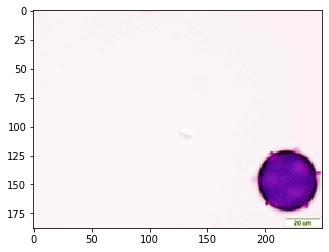

In [36]:
image = read_image_bgr('/content/drive/My Drive/Colab Notebooks/ds11/612.png')
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


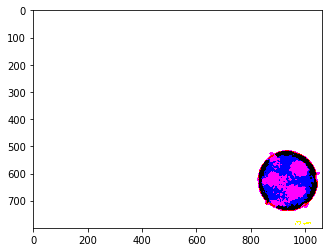

In [37]:
# load image
#image = read_image_bgr('/content/drive/My Drive/Colab Notebooks/ds11/0.png')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)
plt.imshow(image)

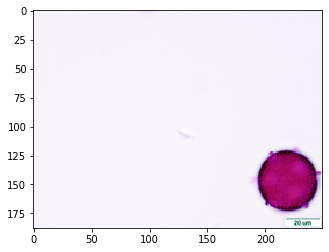

In [38]:
plt.imshow(draw)

processing time:  2.9775092601776123
[189.56775 116.29387 248.45473 176.63805]
0.5890827
7
[191.16171  117.332466 248.99866  176.49289 ]
0.49692073
0


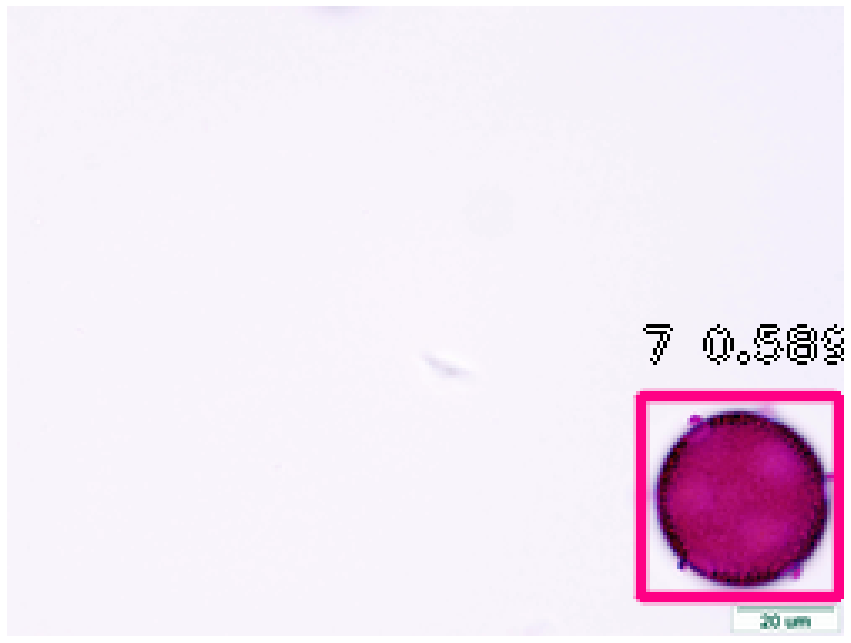

In [39]:
# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

labels_to_names = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10'}

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    print(box)
    print(score)
    print(label)
    # scores are sorted so we can break
    if score < 0.5:
        break
    
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

processing time:  0.07040214538574219
[178.78563 103.96066 246.98787 169.23079]
0.63343215
0
[178.78563 103.96066 246.98787 169.23079]
0.40313137
7


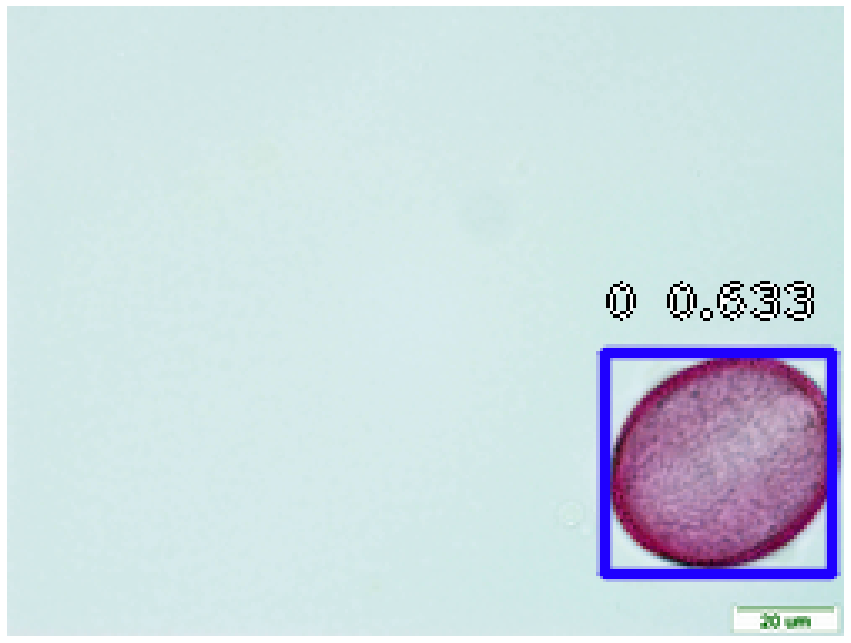

In [40]:
image = read_image_bgr('/content/drive/My Drive/Colab Notebooks/ds11/0.png')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    print(box)
    print(score)
    print(label)
    # scores are sorted so we can break
    if score < 0.5:
        break
    
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

processing time:  0.07198882102966309
[218.6251  131.57204 242.88544 173.87958]
0.56624085
3
[218.17136 132.0867  243.58571 172.95293]
0.2946356
1


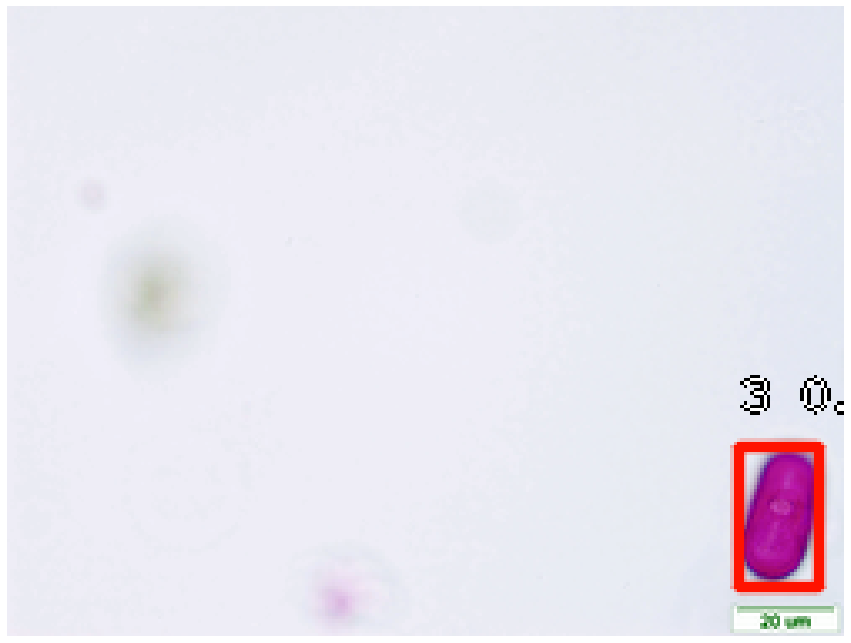

In [41]:
image = read_image_bgr('/content/drive/My Drive/Colab Notebooks/ds11/200.png')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    print(box)
    print(score)
    print(label)
    # scores are sorted so we can break
    if score < 0.5:
        break
    
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()